# Importing the Libraries

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score


### Reading the CSV File

In [214]:
lead_scoring_df=pd.read_csv(r"C:\Users\Krithika\OneDrive\Desktop\project\Project 2\Lead Scoring.csv")
lead_scoring_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [215]:
lead_scoring_df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


#### Extracting the Categorical and continuous columns

In [216]:


categorical_columns = lead_scoring_df.select_dtypes(include=['object']).columns
continuous_columns =lead_scoring_df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Categorical Columns: Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')
Continuous Columns: Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 

In [217]:
lead_scoring_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [218]:
lead_scoring_df.shape

(9240, 37)

In [219]:
lead_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [220]:
lead_scoring_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning ( null values , fill,replace,check for duplicates)

In [221]:
lead_scoring_df.duplicated().sum()

0

In [222]:
lead_scoring_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [223]:
# Dropping Lead Number and Prospect ID since they have all unique values
lead_scoring_df = lead_scoring_df.drop(['Prospect ID', 'Lead Number'], axis=1)
lead_scoring_df.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [224]:
lead_scoring_df=lead_scoring_df.replace('Select', 'N/A')
lead_scoring_df.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,N/A,N/A,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,N/A,N/A,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,N/A,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,N/A,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [225]:
lead_scoring_df=lead_scoring_df.replace('N/A','not available')
lead_scoring_df.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,not available,not available,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,not available,not available,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,not available,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,not available,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [226]:
lead_scoring_df['Lead Profile'].value_counts(dropna=False).head()

Lead Profile
not available            4146
NaN                      2709
Potential Lead           1613
Other Leads               487
Student of SomeSchool     241
Name: count, dtype: int64

In [227]:
lead_scoring_df['Lead Profile'] = lead_scoring_df['Lead Profile'].replace(np.nan, 'Lead Level not specified')
lead_scoring_df['Lead Profile'].isnull().sum() 

0

In [228]:
lead_scoring_df['How did you hear about X Education'].value_counts(dropna=False).head()

How did you hear about X Education
not available            5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Name: count, dtype: int64

In [229]:
lead_scoring_df['How did you hear about X Education'] = lead_scoring_df['How did you hear about X Education'].replace(np.nan, 'Not specified')
lead_scoring_df['How did you hear about X Education'] .isnull().sum() 

0

In [230]:
lead_scoring_df['Lead Source'].value_counts(dropna=False).head(10)

Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
NaN                   36
bing                   6
Name: count, dtype: int64

In [231]:
lead_scoring_df['Lead Source'] = lead_scoring_df['Lead Source'].replace(np.nan, 'Others')
lead_scoring_df['Lead Source'].isnull().sum() 

0

In [232]:
lead_scoring_df['Lead Source'] = lead_scoring_df['Lead Source'].replace('google', 'Google')
lead_scoring_df['Lead Source']

0           Olark Chat
1       Organic Search
2       Direct Traffic
3       Direct Traffic
4               Google
             ...      
9235    Direct Traffic
9236    Direct Traffic
9237    Direct Traffic
9238            Google
9239    Direct Traffic
Name: Lead Source, Length: 9240, dtype: object

In [233]:
lead_scoring_df['Country'].value_counts(dropna=False).head()

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Name: count, dtype: int64

In [234]:
lead_scoring_df['Country'] = lead_scoring_df['Country'].replace(np.nan, 'India')
lead_scoring_df['Country'].isnull().sum()

0

In [235]:
lead_scoring_df['City'].value_counts(dropna=False).head(7)

City
Mumbai                         3222
not available                  2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Name: count, dtype: int64

In [236]:
lead_scoring_df['City']=lead_scoring_df['City'].replace(np.nan,'Mumbai')
lead_scoring_df['City'].isnull().sum()

0

In [237]:
lead_scoring_df['Specialization'].value_counts(dropna=False).head()

Specialization
not available                1942
NaN                          1438
Finance Management            976
Human Resource Management     848
Marketing Management          838
Name: count, dtype: int64

In [238]:
lead_scoring_df['Specialization']= lead_scoring_df['Specialization'].replace(np.nan, 'Not specified')
lead_scoring_df['Specialization'].isnull().sum() 

0

In [239]:
lead_scoring_df['What is your current occupation'].value_counts(dropna=False).head()

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Name: count, dtype: int64

In [240]:
lead_scoring_df['What is your current occupation']= lead_scoring_df['What is your current occupation'].replace(np.nan, 'Not Specified')
lead_scoring_df['What is your current occupation'].isnull().sum() 

0

In [241]:
lead_scoring_df['What matters most to you in choosing a course'].value_counts(dropna=False).head()

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [242]:
lead_scoring_df['What matters most to you in choosing a course'] = lead_scoring_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
lead_scoring_df['What matters most to you in choosing a course'].isnull().sum() 

0

In [243]:
lead_scoring_df['Tags'].value_counts(dropna=False).head()

Tags
NaN                                    3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: count, dtype: int64

In [244]:
lead_scoring_df['Tags'] = lead_scoring_df['Tags'].replace(np.nan, 'Not specified')
lead_scoring_df['Tags'].isnull().sum() 

0

In [245]:
lead_scoring_df['Last Activity'].value_counts(dropna=False).head()

Last Activity
Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: count, dtype: int64

In [246]:
lead_scoring_df['Last Activity'] = lead_scoring_df['Last Activity'].replace(np.nan, 'Others')
lead_scoring_df['Last Activity'].isnull().sum() 

0

In [247]:
lead_scoring_df['Last Notable Activity'].value_counts(dropna=False).head()

Last Notable Activity
Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Name: count, dtype: int64

In [248]:
lead_scoring_df['Do Not Email'].value_counts(dropna=False).head()

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

In [249]:
lead_scoring_df['TotalVisits'].value_counts(dropna=False).head()

TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: count, dtype: int64

In [250]:
lead_scoring_df['TotalVisits'].fillna(lead_scoring_df['TotalVisits'].median(), inplace=True)
lead_scoring_df['TotalVisits'].isnull().sum() 

0

In [251]:
lead_scoring_df['Asymmetrique Activity Index']=lead_scoring_df['Asymmetrique Activity Index'].fillna('not_specified')
lead_scoring_df['Asymmetrique Profile Index']=lead_scoring_df['Asymmetrique Profile Index'].fillna('not_specified') 
lead_scoring_df['Asymmetrique Activity Score']=lead_scoring_df['Asymmetrique Activity Score'].fillna('not_specified') 
lead_scoring_df['Asymmetrique Profile Score']=lead_scoring_df['Asymmetrique Profile Score'].fillna('not_specified') 
lead_scoring_df['Asymmetrique Activity Index'].isnull().sum()
lead_scoring_df['Asymmetrique Profile Index'].isnull().sum()
lead_scoring_df['Asymmetrique Activity Score'].isnull().sum()
lead_scoring_df['Asymmetrique Profile Score'].isnull().sum()

0

In [252]:
lead_scoring_df['Page Views Per Visit'].value_counts(dropna=False).head()

Page Views Per Visit
0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: count, dtype: int64

In [253]:
lead_scoring_df['Page Views Per Visit'].fillna(lead_scoring_df['Page Views Per Visit'].median(), inplace=True)

In [254]:
lead_scoring_df['Page Views Per Visit'].dtype

dtype('float64')

In [255]:
lead_scoring_df['Page Views Per Visit']=lead_scoring_df['Page Views Per Visit'].astype('int')

In [256]:
lead_scoring_df['Lead Quality']=lead_scoring_df['Lead Quality'].replace(np.nan,'Lead Quality Not Specified')
lead_scoring_df['Lead Quality'].isnull().sum()

0

In [257]:
lead_scoring_df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

### Checking for Outliers

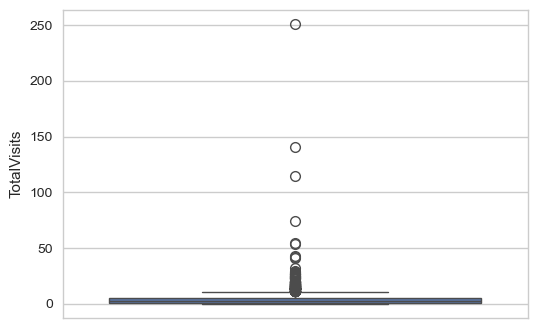

In [258]:
## here we can observe outliers for Totalvisits
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_scoring_df['TotalVisits'])
plt.show()

In [259]:
lead_scoring_df['TotalVisits'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

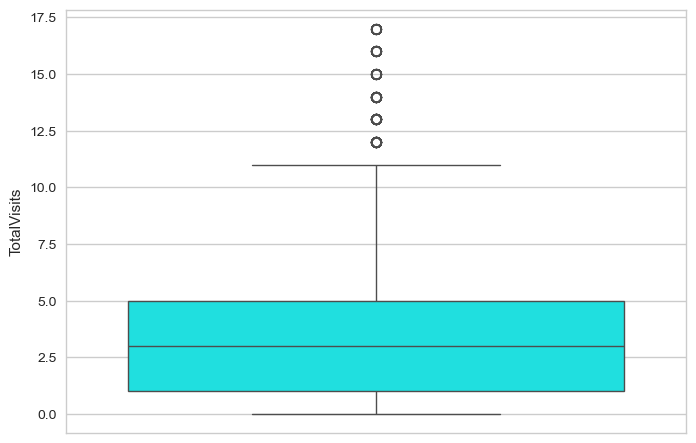

In [260]:
## We can remove top and bottom 0.01, i.e 1% of the outlier values

# Remove top 1% outliers
Q3 = lead_scoring_df['TotalVisits'].quantile(0.99)
lead_scoring_df = lead_scoring_df[(lead_scoring_df.TotalVisits <= Q3)]

# Remove bottom 1% outliers
Q1 = lead_scoring_df['TotalVisits'].quantile(0.01)
lead_scoring_df = lead_scoring_df[(lead_scoring_df.TotalVisits >= Q1)]

# Plot boxplot
sns.boxplot(y=lead_scoring_df['TotalVisits'], color='cyan')

# Apply valid style
plt.style.use('seaborn-v0_8-whitegrid')
plt.show()

In [261]:
## this is to check for available styles

import matplotlib.pyplot as plt  
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [262]:
#Total Time Spent on Website column

lead_scoring_df['Total Time Spent on Website'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9157.000000
mean      486.189036
std       547.695908
min         0.000000
5%          0.000000
25%        10.000000
50%       247.000000
75%       933.000000
90%      1379.000000
95%      1559.400000
99%      1839.440000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

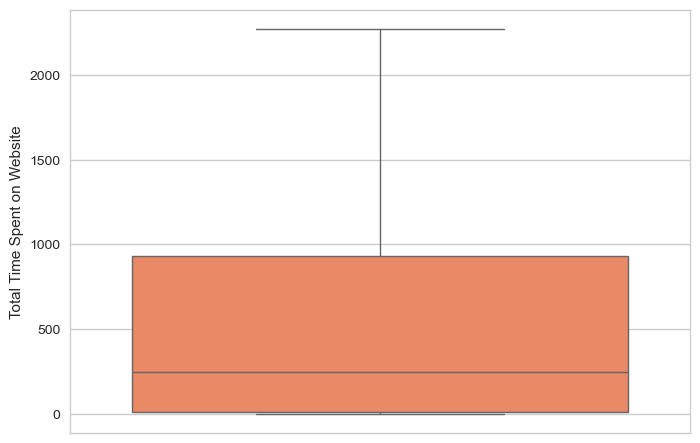

In [263]:
sns.boxplot(y=lead_scoring_df['Total Time Spent on Website'], color='coral')
plt.style.use('seaborn-v0_8')
plt.show()   ## No clear presence of outliers here, hence no outlier treatment required

In [264]:
#Page Views Per Visit column

lead_scoring_df['Page Views Per Visit'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9157.000000
mean        2.266790
std         2.053171
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

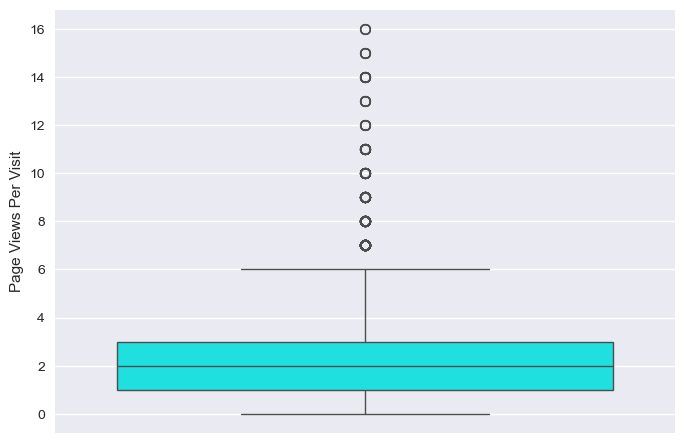

In [265]:
#Clear presence of outliers here

sns.boxplot(y=lead_scoring_df['Page Views Per Visit'], color='cyan')
plt.style.use('seaborn-v0_8')
plt.show()


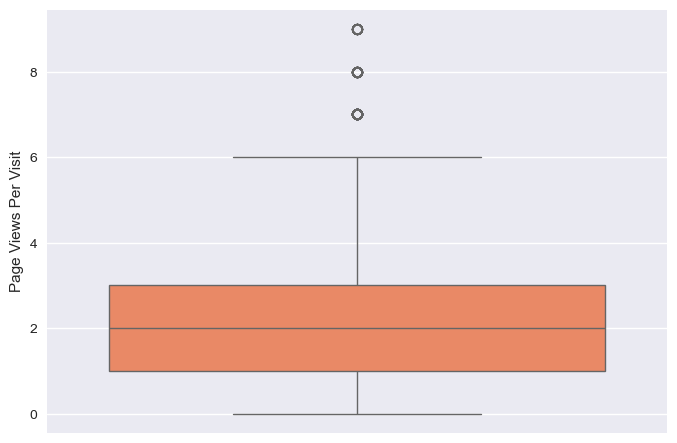

In [266]:
## We can remove top and bottom 0.01, i.e 1% of the outlier values

Q3 = lead_scoring_df['Page Views Per Visit'].quantile(0.99)
lead_scoring_df = lead_scoring_df[(lead_scoring_df.TotalVisits<=Q3)]
               
Q1 = lead_scoring_df['Page Views Per Visit'].quantile(0.01)
leads = lead_scoring_df[(lead_scoring_df.TotalVisits>=Q1)]
               
sns.boxplot(y=lead_scoring_df['Page Views Per Visit'], color='coral')
plt.style.use('seaborn-v0_8-whitegrid')
plt.show()

In [267]:
##Identify Categorical Columns

# Select columns with object data type
categorical_cols = lead_scoring_df.select_dtypes(include='object').columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [268]:
lead_scoring_df['Country'].unique()

array(['India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Sweden', 'Nigeria', 'Hong Kong',
       'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya', 'Italy',
       'South Africa', 'Tanzania', 'unknown', 'Malaysia', 'Netherlands',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [269]:
# Convert 'Country' column to category
lead_scoring_df['Country'] = lead_scoring_df['Country'].astype('category')

# Create a new column with encoded values
lead_scoring_df['Country_code'] = lead_scoring_df['Country'].cat.codes


# Show a sample of the encoded data
lead_scoring_df[['Country', 'Country_code']].tail(30)


,Country,Country_code
9208,India,12
9209,India,12
9210,India,12
9211,India,12
9212,India,12
9213,India,12
9214,India,12
9215,India,12
9216,India,12
9217,India,12


In [270]:
lead_scoring_df['Lead Source'] = lead_scoring_df['Lead Source'].astype('category')
lead_scoring_df['Lead_Source_1']= lead_scoring_df['Lead Source'].cat.codes
lead_scoring_df[['Lead Source','Lead_Source_1']].head(20)

,Lead Source,Lead_Source_1
0,Olark Chat,6
1,Organic Search,7
2,Direct Traffic,1
3,Direct Traffic,1
4,Google,3
5,Olark Chat,6
6,Google,3
7,Olark Chat,6
8,Direct Traffic,1
9,Google,3


In [271]:
lead_scoring_df.to_csv("lead_score_df.csv", index=False)

In [272]:
lead_scoring_df.to_csv(r"C:\Users\Krithika\OneDrive\Desktop\project\Project 2\lead_score_df.csv", index=False)

In [273]:
19/20


0.95

In [274]:
lead_scoring_df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [275]:
## Dropping blank spaces

blank=lead_scoring_df.dropna(how= 'all')
blank.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Country_code,Lead_Source_1
0,API,Olark Chat,No,No,0,0.0,0,0,Page Visited on Website,India,...,not available,02.Medium,02.Medium,15.0,15.0,No,No,Modified,12,6
1,API,Organic Search,No,No,0,5.0,674,2,Email Opened,India,...,not available,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,12,7
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2,Email Opened,India,...,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,12,1
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1,Unreachable,India,...,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,12,1
4,Landing Page Submission,Google,No,No,1,2.0,1428,1,Converted to Lead,India,...,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,12,3
5,API,Olark Chat,No,No,0,0.0,0,0,Olark Chat Conversation,India,...,Mumbai,01.High,02.Medium,17.0,15.0,No,No,Modified,12,6
6,Landing Page Submission,Google,No,No,1,2.0,1640,2,Email Opened,India,...,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified,12,3
7,API,Olark Chat,No,No,0,0.0,0,0,Olark Chat Conversation,India,...,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified,12,6
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2,Email Opened,India,...,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened,12,1
9,API,Google,No,No,0,4.0,58,4,Email Opened,India,...,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened,12,3


In [276]:
lead_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    8773 non-null   object  
 1   Lead Source                                    8773 non-null   category
 2   Do Not Email                                   8773 non-null   object  
 3   Do Not Call                                    8773 non-null   object  
 4   Converted                                      8773 non-null   int64   
 5   TotalVisits                                    8773 non-null   float64 
 6   Total Time Spent on Website                    8773 non-null   int64   
 7   Page Views Per Visit                           8773 non-null   int32   
 8   Last Activity                                  8773 non-null   object  
 9   Country                                       

### Feature Engineering steps

In [277]:
## Taking a copy of the data set

lead_score=lead_scoring_df.copy()
lead_score

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Country_code,Lead_Source_1
0,API,Olark Chat,No,No,0,0.0,0,0,Page Visited on Website,India,...,not available,02.Medium,02.Medium,15.0,15.0,No,No,Modified,12,6
1,API,Organic Search,No,No,0,5.0,674,2,Email Opened,India,...,not available,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,12,7
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2,Email Opened,India,...,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,12,1
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1,Unreachable,India,...,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,12,1
4,Landing Page Submission,Google,No,No,1,2.0,1428,1,Converted to Lead,India,...,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2,Email Marked Spam,Saudi Arabia,...,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam,25,1
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2,SMS Sent,India,...,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent,12,1
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2,SMS Sent,India,...,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent,12,1
9238,Landing Page Submission,Google,No,No,1,3.0,499,3,SMS Sent,India,...,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent,12,3


In [278]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    8773 non-null   object  
 1   Lead Source                                    8773 non-null   category
 2   Do Not Email                                   8773 non-null   object  
 3   Do Not Call                                    8773 non-null   object  
 4   Converted                                      8773 non-null   int64   
 5   TotalVisits                                    8773 non-null   float64 
 6   Total Time Spent on Website                    8773 non-null   int64   
 7   Page Views Per Visit                           8773 non-null   int32   
 8   Last Activity                                  8773 non-null   object  
 9   Country                                       

#### Assigning independent and dependent values

In [279]:

X = lead_score.drop('Converted', axis=1)
y = lead_score['Converted']

In [280]:
X.shape

(8773, 36)

In [281]:
X=pd.get_dummies(X,drop_first=True)  #in pandas is part of the One-Hot Encoding process.

In [282]:
X.shape

(8773, 212)

In [283]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country_code,Lead_Source_1,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0,12,6,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2,12,7,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2,12,1,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1,12,1,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1,12,3,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [284]:
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=42)

# Display the shapes
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

print(X_train.shape)  
print(X_test.shape)  
  
print(y_train.shape)  
print(y_test.shape)  


Training Set: (6141, 212) (6141,)
Testing Set: (2632, 212) (2632,)
(6141, 212)
(2632, 212)
(6141,)
(2632,)


In [285]:
## acc_list=[]

## LR=LogisticRegression()
##lr=LR.fit(X_train,y_train)
##lr_pred=lr.predict(X_test)
##lr_acc_score=accuracy_score(y_test,lr_pred)*100
##acc_list.append(lr_acc_score)
##(lr_acc_score)


### LogisticRegression 

In [286]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with scaled data

acc_list=[]
prec_list=[] 
recall_list=[]

LR= LogisticRegression()
lr= LR.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_acc_score_1=accuracy_score(y_test,lr_pred)*100
acc_list.append(lr_acc_score_1)
print("Accuracy of LR:", lr_acc_score_1)

lr_prec_score = precision_score(y_test, lr_pred, average='binary') * 100
prec_list.append(lr_prec_score)
print("Precision score of LR :",lr_prec_score)  

lr_recall_score = recall_score(y_test, lr_pred, average='binary') * 100
recall_list.append(lr_recall_score)
print("Recall of LR :",lr_recall_score)



Accuracy of LR: 95.32674772036475
Precision score of LR : 93.34006054490413
Recall of LR : 94.19551934826885


### DecisionTreeClassifier

In [287]:
DT=DecisionTreeClassifier()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=accuracy_score(y_test,dt_pred)*100
acc_list.append(dt_acc_score)
print("Accuracy of DT:", dt_acc_score)

dt_prec_score = precision_score(y_test, dt_pred, average='binary') * 100
prec_list.append(dt_prec_score)
print("Precision score of DT :",dt_prec_score)

dt_recall_score = recall_score(y_test, dt_pred, average='binary') * 100
recall_list.append(dt_recall_score)
print("Recall of DT :",dt_recall_score)


Accuracy of DT: 92.66717325227964
Precision score of DT : 89.17576961271102
Recall of DT : 91.44602851323829


### RandomForestClassifier

In [288]:
RF=RandomForestClassifier()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=accuracy_score(y_test,rf_pred)*100
acc_list.append(rf_acc_score)
print("Accuracy of RF:",rf_acc_score)


rf_prec_score = precision_score(y_test, rf_pred, average='binary') * 100
prec_list.append(rf_prec_score)
print("Precision score of DT :",rf_prec_score)

rf_recall_score = recall_score(y_test, rf_pred, average='binary') * 100
recall_list.append(rf_recall_score)
print("Recall of RF :",rf_recall_score)


Accuracy of RF: 94.6048632218845
Precision score of DT : 93.38842975206612
Recall of RF : 92.05702647657841


###  Support Vector Classifier SVC

In [289]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

svc_acc_score = accuracy_score(y_test, svc_pred) * 100
acc_list.append(svc_acc_score)
print("Accuracy of SVC:",svc_acc_score)

svc_prec_score = precision_score(y_test, svc_pred, average='binary') * 100
prec_list.append(svc_prec_score)
print("Precision score of SVC :",svc_prec_score)

svc_recall_score = recall_score(y_test, svc_pred, average='binary') * 100
recall_list.append(svc_recall_score)
print("Recall of SVC :",svc_recall_score)



Accuracy of SVC: 73.25227963525836
Precision score of SVC : 68.63270777479893
Recall of SVC : 52.138492871690424


### KNeighborsClassifier


In [290]:
KNN=KNeighborsClassifier()
knn=KNN.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_acc_score=accuracy_score(y_test,knn_pred)*100
acc_list.append(knn_acc_score)
print("Accuracy of KNN :",knn_acc_score)

knn_prec_score = precision_score(y_test, knn_pred, average='binary') * 100
prec_list.append(knn_prec_score)
print("Precision score of KNN :",knn_prec_score)

knn_recall_score = recall_score(y_test, knn_pred, average='binary') * 100
recall_list.append(knn_recall_score)
print("Recall of KNN :",knn_recall_score)



Accuracy of KNN : 80.12917933130699
Precision score of KNN : 74.08184679958028
Recall of KNN : 71.89409368635438


In [291]:
## Accurancy 

for index ,acc_ in enumerate(acc_list):
    if acc_ == max(acc_list):
        i = index
i

acc_list

[95.32674772036475,
 92.66717325227964,
 94.6048632218845,
 73.25227963525836,
 80.12917933130699]

In [292]:
## Precision Score

for index ,prec_ in enumerate(prec_list):
    if acc_ == max(prec_list):
        i = index
i

prec_list

[93.34006054490413,
 89.17576961271102,
 93.38842975206612,
 68.63270777479893,
 74.08184679958028]

In [293]:
## Recall score

for index ,recall_ in enumerate(recall_list):
    if acc_ == max(recall_list):
        i = index
i

recall_list

[94.19551934826885,
 91.44602851323829,
 92.05702647657841,
 52.138492871690424,
 71.89409368635438]

##  Cross Validation ( K-Fold) 
### for LogisticRegression

In [294]:
#cross_val_score ( K-Fold)

from sklearn.model_selection import cross_val_score 

score_lr=cross_val_score(LogisticRegression(solver='liblinear',max_iter=1000),X,y)
print(score_lr)
print("Mean Accuracy  of LR :",score_lr.mean())

[0.95612536 0.94415954 0.92706553 0.93899658 0.92531357]
Mean Accuracy  of LR : 0.9383321151166075


### for DecisionTreeClassifier

In [295]:
score_DT=cross_val_score(DecisionTreeClassifier(),X,y)
print(score_DT)
print("Mean Accuracy of DT :",score_DT.mean())

[0.91339031 0.92592593 0.91054131 0.93614595 0.89338655]
Mean Accuracy of DT : 0.9158780094013845


### for Random Forest

In [296]:
score_RF=cross_val_score(RandomForestClassifier(),X,y)
print(score_RF)
print("Mean Accuracy of RF :",score_RF.mean())

[0.94472934 0.94814815 0.92478632 0.94583808 0.91904219]
Mean Accuracy of RF : 0.9365088182648046


### for SVC

In [316]:
score_SVC=cross_val_score(SVC(),X,y)
print(score_SVC)
print("Mean Accuracy of SVC :",score_SVC.mean())

[0.74700855 0.70826211 0.73048433 0.7377423  0.7286203 ]
Mean Accuracy of SVC : 0.7304235171053871


 ### for KNeighborsClassifier

In [305]:
score_KNN=cross_val_score(KNeighborsClassifier(),X,y)
print(score_KNN)
print("Mean Accuracy of KNN :",score_KNN.mean())

[0.7965812  0.82051282 0.79373219 0.81870011 0.78563284]
Mean Accuracy of KNN : 0.8030318328151852


#### Mean Accuaracy

In [317]:
import numpy as np

models = {
    'Logistic Regression': [0.9561, 0.9441, 0.9271, 0.9389, 0.9253],
    'Decision Tree': [0.9151, 0.9293, 0.9099, 0.9339, 0.8905],
    'Random Forest': [0.9464, 0.9504, 0.9225, 0.9487, 0.9150],
    'SVC': [0.7470, 0.7083, 0.7308, 0.7377, 0.7286],
    'KNN': [0.7966, 0.8205, 0.7937, 0.8187, 0.7856]
}

for model, scores in models.items():
    print(f"{model}: Mean Accuracy = {np.mean(scores):.4f}")


Logistic Regression: Mean Accuracy = 0.9383
Decision Tree: Mean Accuracy = 0.9157
Random Forest: Mean Accuracy = 0.9366
SVC: Mean Accuracy = 0.7305
KNN: Mean Accuracy = 0.8030


## By using CROSS VALIDATION K FOLD

### Conclusion:

### Best Model: Logistic Regression (mean accuracy = 0.9383)

### Runner-up: Random Forest (mean accuracy = 0.9366)

# Stratified K-Fold Cross Validation

In [308]:
X.shape,y.shape

((8773, 212), (8773,))

### StratifiedKFold for LogisticRegression

In [309]:
from sklearn.model_selection import StratifiedKFold


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

accuracy = []
skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, test_index in skf.split(X_scaled, y):
    print("Train:", train_index, "Validation:", test_index)
    X1_train, X1_test = X_scaled[train_index], X_scaled[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

    lr = LogisticRegression(max_iter=1000, solver='liblinear')
    lr.fit(X1_train, y1_train)
    prediction = lr.predict(X1_test)
    score= accuracy_score(y1_test, prediction)
    accuracy.append(score)

print("Cross-validated accuracies:", accuracy)
print("Average accuracy:", np.mean(accuracy))


Train: [1735 1736 1737 ... 8770 8771 8772] Validation: [   0    1    2 ... 1786 1788 1791]
Train: [   0    1    2 ... 8770 8771 8772] Validation: [1735 1736 1737 ... 3588 3591 3592]
Train: [   0    1    2 ... 8770 8771 8772] Validation: [3342 3348 3349 ... 5442 5444 5445]
Train: [   0    1    2 ... 8770 8771 8772] Validation: [4955 4958 4959 ... 7108 7113 7116]
Train: [   0    1    2 ... 7108 7113 7116] Validation: [6842 6844 6845 ... 8770 8771 8772]
Cross-validated accuracies: [0.9492877492877493, 0.9435897435897436, 0.9242165242165242, 0.93557582668187, 0.9293044469783353]
Average accuracy: 0.9363948581508446


### StratifiedKFold for DecisionTreeClassifier

In [310]:
# StratifiedKFold for DecisionTreeClassifier

DT=DecisionTreeClassifier()
dt=DT.fit(X_train,y_train)
prediction = dt.predict(X1_test)
score= accuracy_score(y1_test, prediction)
accuracy.append(score)

print("Cross-validated accuracies:", accuracy)
print("Average accuracy:", np.mean(accuracy))


Cross-validated accuracies: [0.9492877492877493, 0.9435897435897436, 0.9242165242165242, 0.93557582668187, 0.9293044469783353, 0.9253135689851767]
Average accuracy: 0.9345479766232332


### for RandomForestClassifier

In [311]:
# StratifiedKFold for RandomForestClassifier

RF=RandomForestClassifier()
rf=RF.fit(X_train,y_train)
prediction = rf.predict(X1_test)
score = accuracy_score(y1_test, prediction)
accuracy.append(score)

print("Cross-validated accuracies:", accuracy)
print("Average accuracy:", np.mean(accuracy))

Cross-validated accuracies: [0.9492877492877493, 0.9435897435897436, 0.9242165242165242, 0.93557582668187, 0.9293044469783353, 0.9253135689851767, 0.9407069555302167]
Average accuracy: 0.9354278307528022


### StratifiedKFold for SVC

In [318]:
# StratifiedKFold for SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X1_test)
score = accuracy_score(y1_test, prediction)
accuracy.append(score)

print("Cross-validated accuracies:", accuracy)
print("Average accuracy:", np.mean(accuracy))

Cross-validated accuracies: [0.9492877492877493, 0.9435897435897436, 0.9242165242165242, 0.93557582668187, 0.9293044469783353, 0.9253135689851767, 0.9407069555302167, 0.6191562143671607, 0.7936145952109465, 0.6191562143671607]
Average accuracy: 0.8579921839214883


### StratifiedKFold for KNeighborsClassifier


In [319]:
# StratifiedKFold for KNeighborsClassifier

KNN=KNeighborsClassifier()
knn=KNN.fit(X_train,y_train)
prediction = knn.predict(X1_test)
score = accuracy_score(y1_test, prediction)
accuracy.append(score)

print("Cross-validated accuracies:", accuracy)
print("Average accuracy:", np.mean(accuracy))

Cross-validated accuracies: [0.9492877492877493, 0.9435897435897436, 0.9242165242165242, 0.93557582668187, 0.9293044469783353, 0.9253135689851767, 0.9407069555302167, 0.6191562143671607, 0.7936145952109465, 0.6191562143671607, 0.7936145952109465]
Average accuracy: 0.8521396758568937


## By using CROSS VALIDATION (StratifiedKFold)

### Conclusion:

### Best Model: Logistic Regression (mean accuracy =  0.9364)

### Runner-up: Random Forest (mean accuracy = 0.9307)